<a href="https://colab.research.google.com/github/LLewis/ai-deep-learning/blob/main/Lewis_ANN_learningrates-as-changing-parameters-for-each-model-uisng-Qwerties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [298]:
#import libraries
import torch
import torch.nn as nn
import numpy as np
from torch.optim import optimizer

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-298-c97a9eaa485d>:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


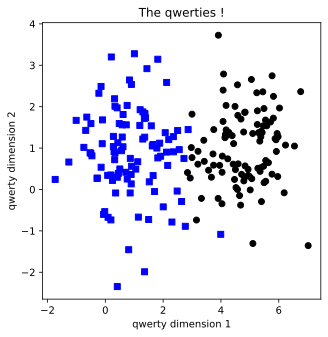

In [299]:
#Create the data

nPerClust = 100
blur = 1  #this is my standard diviation - shows spreadout the data value (individual data points) is from its cluster

#x , y center quartenants for the data cloud
# so A will be center with x= 1, and y = 1
# and B will be center with x=5, and y = 1
A = [1,1]
B = [5,1]

#Generate Data
#add random numbers to each element value in  vector A and B
a = [ A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur, B[1]+ np.random.randn(nPerClust)*blur ]

#Creating the Category labels -dummy coded category labels - coverting to numbers
#one half of data is qwerty type ZEROS and the other half is qwerty type ONES
#this creates the categories
labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))

#here I'm stacking each vector into one data matrix (array) - concatenate into a matrix using T - Transpose
data_np = np.hstack((a,b)).T

#Convert to a pytorch tensor - a vector in pytorch
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()


#show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
plt.title('The qwerties !')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


In [300]:
#Extra - Inspect data types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


A numpy array
class 'numpy.ndarray'>
(200, 2)

 A numpy array converted into a tensor (matrix)
 200 for individual data points
 2 refers to the x and y values
<class 'torch.Tensor'>
torch.Size([200, 2])

Functions to build and train the model

In [301]:
#1 Create Two Functions that build and train the model
# 2 #Other model features
   # learningRate = .01 - will pass in this parametric value into new function below.
# Build model function

def createANNmodel(learningRate):
  ANNclassify = nn.Sequential(
      nn.Linear(2,1),  #input layer  - two input features the x coordinate values and the y coordinate values - its two deminsional
      nn.ReLU(),       #activation unit
      nn.Linear(1,1),  #output unit
      #nn.Sigmoid(),    #final activation unit(here the conceptual reasons, in practice) - (not needed here b/c I use BCEWithLogitsLoss())
      )

  # loss function
  # - not a MSE (Mean Squared Error, (y-y(prediction)^2)problem it is a Binary Cross Entropy loss
  # Binary Cross Entrophy Loss Function
  # better to use BCEWithLogitsLoss more stable than the Sigmoid() function.  The Sigmoid() function is incorportated into the BCEloss() function

  lossfun = nn.BCEWithLogitsLoss()   #explicitly implements the Sigmoid function - the center of the Sigmoid function is .5

  #optimizer is the flavor of gradient descent - using Stocastic Gradient Descent (Other gradient descent flavors: RMS Prompt, Momentum and the ATOM Algorithm )
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)


  #model output
  return ANNclassify,lossfun,optimizer  #output is , the model, the loss function and the optimizer


output for ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)



In [302]:

#Train the Model Function

#a fixed parameter
numepochs = 1000

def trainTheModel(ANNmodel):
  #initialize the losses - to keep track of the model performance
  losses = torch.zeros(numepochs)

  # loop over epochs  (repeat 1000 times for each step (1,2,3) for each numepochs and optimizer )
  for epochi in range(numepochs):

    # Step 1 forward pass - yHat is final out - prediction of model
    yHat = ANNmodel(data)

    # Step 2 compute Loss
    loss = lossfun(yHat, labels) #yHat- model prediction and labels - true/real data
    losses[epochi]= loss

    #Step 3 back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() #stepping forward through the optimizer


    # get the final foward pass - predictions from the output of the model
    predictions = ANNmodel(data)

    #compute the predictions and report accuracy
    # NOTE: shouldn't it be predictions > .5?? - use .5 when actually using the Sigmoid()function, I used the BCEWithLogitsLoss() function that
    #explicitly implements the Sigmoid function, therefore I compare the predictions to 0 not .5
    # So for each data point does the predicated value == the real/true label Value
    #get the average of all true and false points
    totalacc = 100*torch.mean(((predictions>0)== labels).float())

    return losses,predictions,totalacc



Test the new code by running it once

Final accuracy: 50%


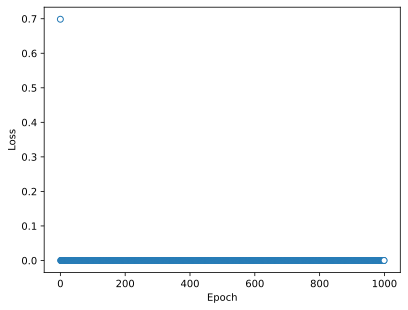

In [305]:

#Create Everything here, the model, lossfun and optimizer

# create a new model with a learning rate of .01
ANNclassify,lossfun,optimizer = createANNmodel(.01)

#Run it
losses,predictions,totalacc = trainTheModel(ANNclassify)

#print report accuracy - model predicts the percentange of accuracy in separating the blue and black qwerties
print('Final accuracy: %g%%' %totalacc)

#Show the losses
plt.plot(losses.detach(),'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

here the graph shows the losses are going down over time 1000 training epochs
however, they have not reached a certain platue , the losses have not acentoted ?
so this mean the model needs more data to learn from, so I could
increase training epochs
increase the learning rate
modify the optimizer

Now for the Experiment

In [314]:
from IPython.core.pylabtools import figsize
# the set of learning rates to test
# learningrate range is between .001 through .1 in 40 linear spaced steps
#learningrate is a vector
learningrates = np.linspace(.001,.1,40)

#initialize results output
#accuracy by learningrate
accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))

#loop through learning rates
# enumerating to get the looping index variable, i used for allLosses[i,:] and the learningrate
for i,lr,in enumerate(learningrates):

  #create and run the model
  ANNclassify,lossfun,optimizer = createANNmodel(lr)
  losses,predictions,totalacc = trainTheModel(ANNclassify)

  #store the results - the accuracy and the losses
  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach()








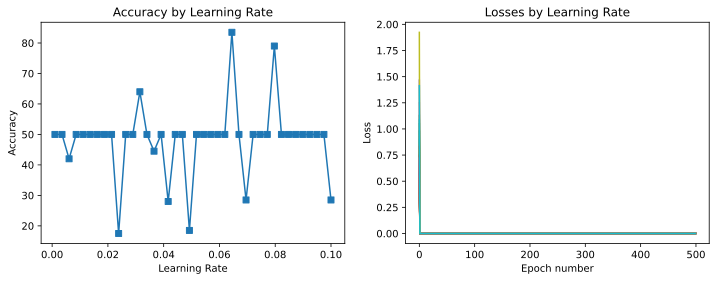

In [315]:

  #plot the results
  fig, ax = plt.subplots(1,2,figsize=(12,4))

  ax[0].plot(learningrates,accByLR, 's-')
  ax[0].set_xlabel('Learning Rate')
  ax[0].set_ylabel('Accuracy')
  ax[0].set_title('Accuracy by Learning Rate')

  ax[1].plot(allLosses.T)
  ax[1].set_title('Losses by Learning Rate')
  ax[1].set_xlabel('Epoch number')
  ax[1].set_ylabel('Loss')
  plt.show()

In [310]:
#proportion of runs where the model had at least 70% accuracy
#results were tensor(0.0500) small number of models performed well over 70 accuracy - change played a large role
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.1250)

New Experiment:  Repeat the previous experiment(the 1 experiment) 50 times and average the results.

Run a meta-experiment to get more reliable results.  Running the same experiment multiple times - this can be viewed as the meta part


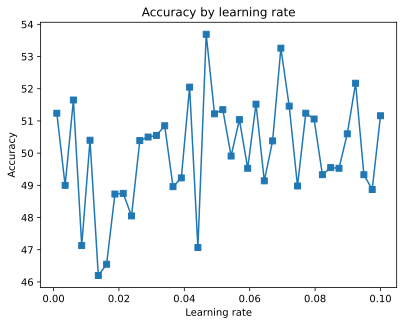

In [316]:
# Now run a "meta-experiment" by repeating the experiment N times
# (different random weight initializations each time)
# NOTE: this cell takes ~7 minutes, running multiple models

#number of time to iterate through the experiment
numExps = 50

#matrix to store all results
accMeta = np.zeros((numExps, len(learningrates)))

#fewer epochs to reduce computation time
numepochs = 500

#Now for the experiment
for expi in range(numExps):
  for i,lr in enumerate(learningrates):

    #create and run the model
    ANNclassify,lossfun,optimizer = createANNmodel(lr)
    losses,predictions,totalacc = trainTheModel(ANNclassify)

    #store the results
    accMeta[expi,i] = totalacc

#now plot the results, averaged over each 50 experiments
plt.plot(learningrates,np.mean(accMeta,axis=0),'s-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()